<a href="https://colab.research.google.com/github/mansi05-t/Titanic-Survival-Prediction/blob/master/Titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Dataset

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

**Problem:**

What sorts of people were more likely to survive?

In [ ]:
# importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Import the dataset


In [ ]:
from google.colab import files
files = files.upload()

In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape

(891, 12)

The data has 891 rows and 12 columns.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The training-set has 891 examples and 11 features + the target variable (survived). 

2 of the features are floats, 5 are integers and 5 are objects. 



# Data Description

1. survival: Survival (0 = No; 1 = Yes)

2. pclass: Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)

3. name: Name of passenger

4. sex: Gender of passenger

5. age: Age of passenger
 
6. sibsp: Number of Siblings/Spouses Aboard

7. parch: Number of Parents/Children Aboard

8. ticket: Ticket Number

9. fare: Passenger Fare

10. cabin: The cabin of passenger

11. embarked: Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

In [ ]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


Above we can see that 38% out of the training-set survived the Titanic. 

We can also see that the passenger ages range from 0.4 to 80. 

On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

In [ ]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Observations :**
*  There are numerous counts of NaN for train['cabin']
*   PassengerId and Ticket observations will not be relevant to my analysis, so I will drop these columns





In [ ]:
df = train.drop(['Cabin', 'Ticket', 'PassengerId'], axis=1)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


# Univariate Analysis

# What is the Count of Survived vs Not Survived?

In [ ]:
a= df['Survived'].value_counts()
b= df['Survived'].value_counts(normalize = True)

In [ ]:
print(a)
print(b)

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64



Only 339, around 38% of the passengers were survived, where as a majority 549 (61%) of the passenger did not survive the disaster

## Visualize Survived vs Not Survived:

Text(0.5, 1.0, 'Count of Passengers who survived')

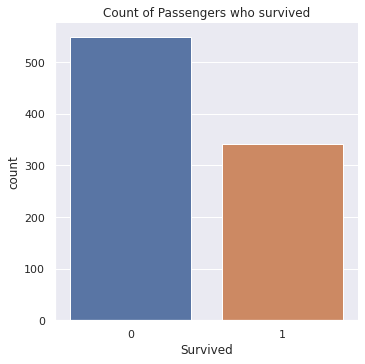

In [ ]:
sns.factorplot('Survived', data= train, kind='count')
plt.title('Count of Passengers who survived')

In [ ]:
# Extract titles from the Cloumn 'Name'
df['Initial']=0
for i in df:
    df['Initial']=df.Name.str.extract('([A-Za-z]+)\.')

# Replacing the less used titles with the most common title
df['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess',
                               'Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss',
                                'Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [ ]:
df.Initial.value_counts().reset_index()

,index,Initial
0,Mr,527
1,Miss,185
2,Mrs,127
3,Master,40
4,Other,9


In [ ]:
df.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [ ]:
## Replacing null values in Age with the average

df.loc[(df.Age.isnull()) & (df.Initial=='Mr'),'Age']=33
df.loc[(df.Age.isnull()) & (df.Initial=='Mrs'),'Age']=36
df.loc[(df.Age.isnull()) & (df.Initial=='Master'),'Age']=5
df.loc[(df.Age.isnull()) & (df.Initial=='Miss'),'Age']=22
df.loc[(df.Age.isnull()) & (df.Initial=='Other'),'Age']=46

In [ ]:
# Converting data into numeric form

data = [df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
genders = {"male": 0, "female": 1}
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in data:
    dataset['Initial'] = dataset['Initial'].map(titles)
    dataset['Sex'] = dataset['Sex'].map(genders)
    dataset['Embarked'] = dataset['Embarked'].map(ports)
    dataset['Fare'] = dataset['Fare'].astype(int)
df = df.drop(['Name'], axis=1)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial
0,0,3,0,22.0,1,0,7,0.0,1
1,1,1,1,38.0,1,0,71,1.0,3
2,1,3,1,26.0,0,0,7,0.0,2
3,1,1,1,35.0,1,0,53,0.0,3
4,0,3,0,35.0,0,0,8,0.0,1


# Visual EDA for single Continuous Column: "Fare" using Distribution Plot



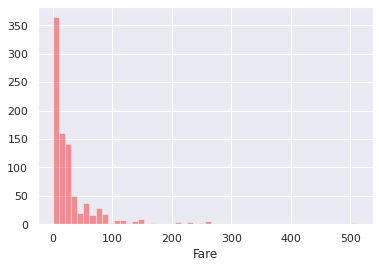

In [ ]:
sns.distplot(df['Fare'],kde=False,color='red')

Most of the passengers were with in the Fare range of $100.

# EDA for 'Age'

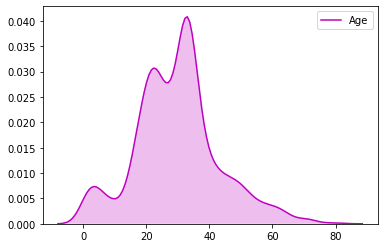

In [ ]:
sns.kdeplot(df.Age, shade=True, color = 'm');

Most of the people's age belong to the range of 20 to 35.

# Bivariate Analysis

# What is the count of Males and Females Survived and Not Survived in each Class?


In [ ]:
pd.crosstab(train.Pclass, [train.Survived, train.Sex ] , normalize=False)

Survived      0           1     
Sex      female male female male
Pclass                          
1             3   77     91   45
2             6   91     70   17
3            72  300     72   47

Observations:

Womens are saved despite of their class

Class 1 people had the advantage

Most of the people have died from class 3

# Survival based on Passenger Gender Distribution

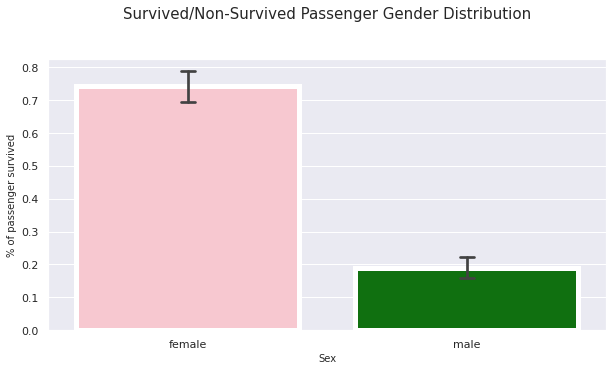

In [ ]:
pal = {'male':"green", 'female':"Pink"}
sns.set(style="darkgrid")
plt.subplots(figsize = (10,5))
ax = sns.barplot(x = "Sex", y = "Survived", 
                 data=train,palette = pal,
                 linewidth=5,
                 order = ['female','male'],
                 capsize = .05,)

plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 15,loc = 'center', pad = 40)
plt.ylabel("% of passenger survived", fontsize = 10, )
plt.xlabel("Sex",fontsize = 10);

# Survived and Not Survived with respect to the 'Embarked' Column:

In [ ]:
pd.crosstab(train.Survived, train.Embarked , normalize=False)

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


Most no. of people survived as well as died are from S

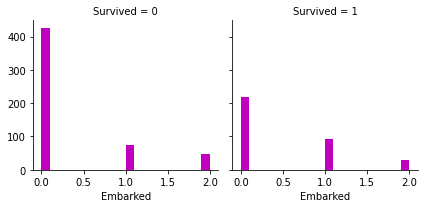

In [ ]:
g = sns.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Embarked', bins=20 , color ='m')

In the above plot, 

0 represents S 

1 represents C

2 represents Q 



# Desnity Graph based on Fare and Survival Rate:

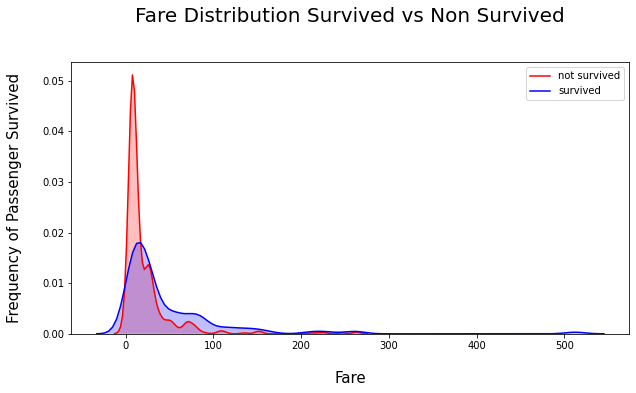

In [ ]:
# Kernel Density Plot
fig = plt.figure(figsize=(10,5),)
ax=sns.kdeplot(df.loc[(df['Survived'] == 0),'Fare'] , color='r',shade=True,label='not survived')
ax=sns.kdeplot(df.loc[(df['Survived'] == 1),'Fare'] , color='b',shade=True, label='survived')
plt.title('Fare Distribution Survived vs Non Survived', fontsize = 20, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Fare", fontsize = 15, labelpad = 20);


The skew in the plot shows that a lot of passengers with a low-cost tickets(less than 100$) did not survive.

People who had paid a bit higher were able to save their lives. Also, when fare is approximately more than 280 dollars, there is no red shade which means, either everyone passed that fare point survived or maybe there is an outlier.

In [ ]:
df[df.Fare > 280]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,relatives,not_alone
258,1,1,1,35.0,0,0,512,1.0,2,0,1
679,1,1,0,36.0,0,1,512,1.0,1,1,0
737,1,1,0,35.0,0,0,512,1.0,1,0,1



As we can see that there are only 3 passangers with the Fare more than $280, and all of them had survived.

# Passenger Class and Survival

In [ ]:
df.pivot_table('Survived', 'Pclass')

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


It is clearly seen that pasangers of Class 1 are given high priority while rescue, almost 63% people survived.

Text(0.5, 0.98, 'Class wise segregation of passengers')

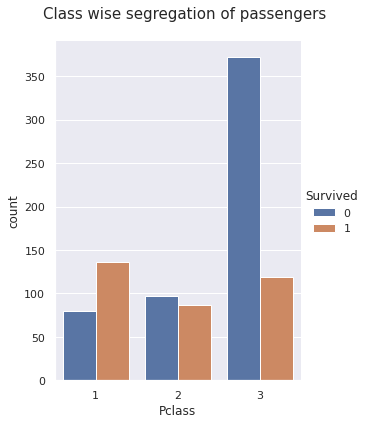

In [ ]:
sns.factorplot('Pclass', hue='Survived', data=train, kind='count', size=6, aspect=.7)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class wise segregation of passengers', fontsize=15)

WKT, 0 represents people's death and 1 represents the survival

Our observation from the abov plot:

* Maximum number of people died are from class 3
* Class 1 passengers had the higher survival chances.

# Survival based on SibSp and Parch

In [ ]:
#Creating New Features
data =[df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
df['not_alone'].value_counts()

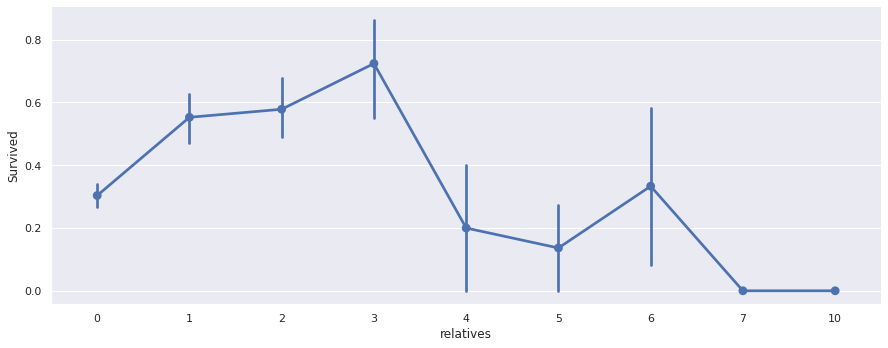

In [ ]:
axes = sns.factorplot('relatives','Survived', 
                      data=df, aspect = 2.5, )

We can see that, you had a high probabilty of survival with 1 to 3 realitves, but a lower one if you had less than 1 or more than 3 (except for some cases with 6 relatives).

# Multivariate EDA

# Impact of Age on Survival for Each Sex

In [ ]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

There are 577 males aboard while 314 are females.

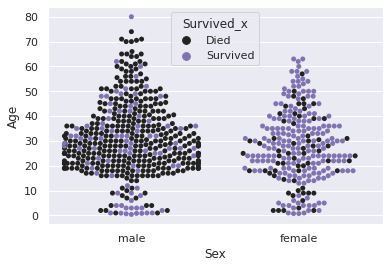

In [ ]:
train['Survived_x'] = train['Survived'].map({0:'Died',1:'Survived'})
y = sns.swarmplot(x= 'Sex', y = 'Age', data = train, hue='Survived_x', color='m')
plt.show()


Observations from the above chart,

Female passengers had better chance of survival than males.

Most of the survival and deaths are from the age-group 20-40.

# Survival based on Sex, Fare and Age

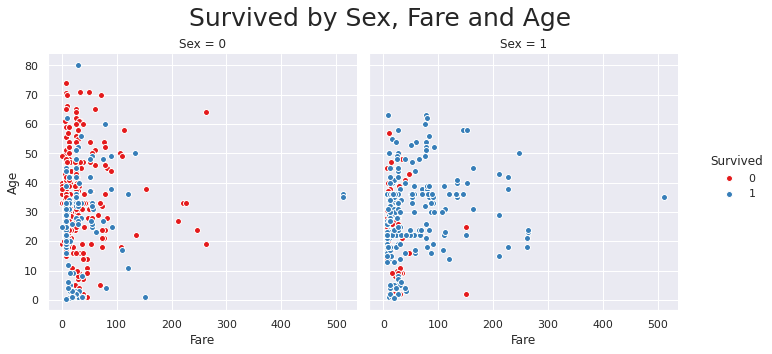

In [ ]:
g = sns.FacetGrid(df, size=5,hue="Survived", col ="Sex", margin_titles=True, palette="Set1")
g.map(plt.scatter, "Fare", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by Sex, Fare and Age", size = 25)
plt.subplots_adjust(top=0.85)

Most of the women survived irrespective of their age and Fare.

Passangers with the expensive tickets had obviously survived.

# Impact of Age on Survival for class group

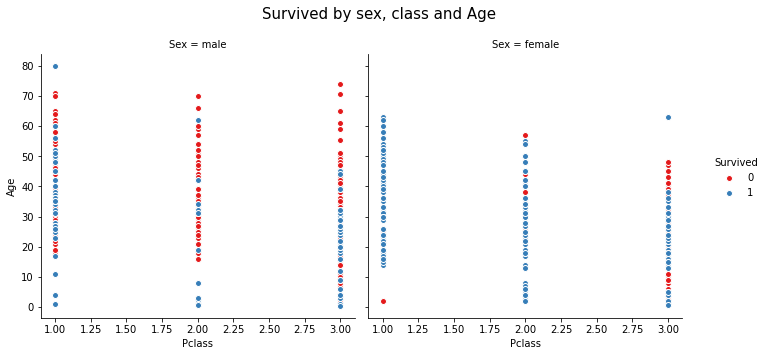

In [ ]:
g = sns.FacetGrid(train, size=5,hue="Survived", col ="Sex", margin_titles=True, palette="Set1")
g.map(plt.scatter, "Pclass", "Age",edgecolor="w").add_legend()
g.fig.suptitle("Survived by sex, class and Age", size = 15)
plt.subplots_adjust(top=0.85)

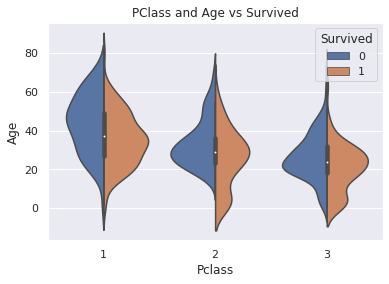

In [ ]:
sns.violinplot('Pclass','Age',hue='Survived',data=train,split=True)
plt.title('PClass and Age vs Survived')
plt.show()


First class passengers had survived titanic tragedy despite of their genders

Most of the womens had survived the tragedy

Most of 3rd class male passangers had lost their lives.

# Plot a HEATMAP showing the correlations between different features:

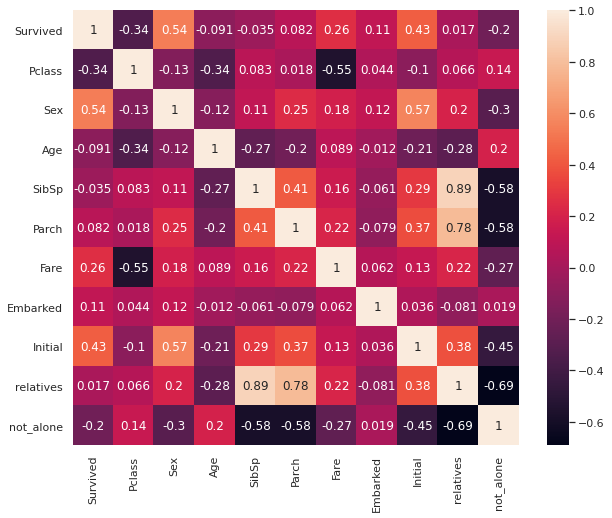

In [ ]:
plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(), annot=True)

Positive Correlation Features:

Fare and Survived: 0.26 {which implies passengers who paid more money for their ticket were more likely to survive}

Sex and Survived: 0.54 { Women had higher survival rate }

Negative Correlation Features:

Fare and Pclass: -0.55 { 1st class passanger paid more than the rest two, similarlry 2nd class paid more than the 3rd }

Pclass and Survived: -0.34 { 1st class passenger had a better chance of surviving than the 2nd or 3rd }

# Building Machine Learning Models

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Initial,relatives,not_alone,Survived_x
0,0,3,0,22.0,1,0,7,0.0,1,1,0,Died
1,1,1,1,38.0,1,0,71,1.0,3,1,0,Survived
2,1,3,1,26.0,0,0,7,0.0,2,0,1,Survived
3,1,1,1,35.0,1,0,53,0.0,3,1,0,Survived
4,0,3,0,35.0,0,0,8,0.0,1,0,1,Died


In [ ]:
df = df.dropna()

In [ ]:
#Train & Test Data

labeles=df['Survived']
features=df[['Pclass','Sex','Age','Initial','SibSp','Parch','not_alone','relatives','Fare','Embarked']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labeles, test_size=0.2,random_state=5 )

**Decision Tree**

In [ ]:
# Decision Tree
from sklearn import tree
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
acc_decision_tree = round(clf.score(X_train, y_train) * 100, 2)

#accuracy
from sklearn.metrics import accuracy_score
#accur=accuracy_score(y_test,pred)
print(acc_decision_tree,"%")

96.77 %


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest,"%")

96.77 %


**Logistic Regression**

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, y_train) * 100, 2)
print(round(acc_log,2,), "%")

81.58 %


In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest','Decision Tree'],
    'Score': [acc_log,acc_random_forest,acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)

result_df.head(9)

,Model,Score
1,Random Forest,96.77
2,Decision Tree,96.77
0,Logistic Regression,81.58


# Feature Importance

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

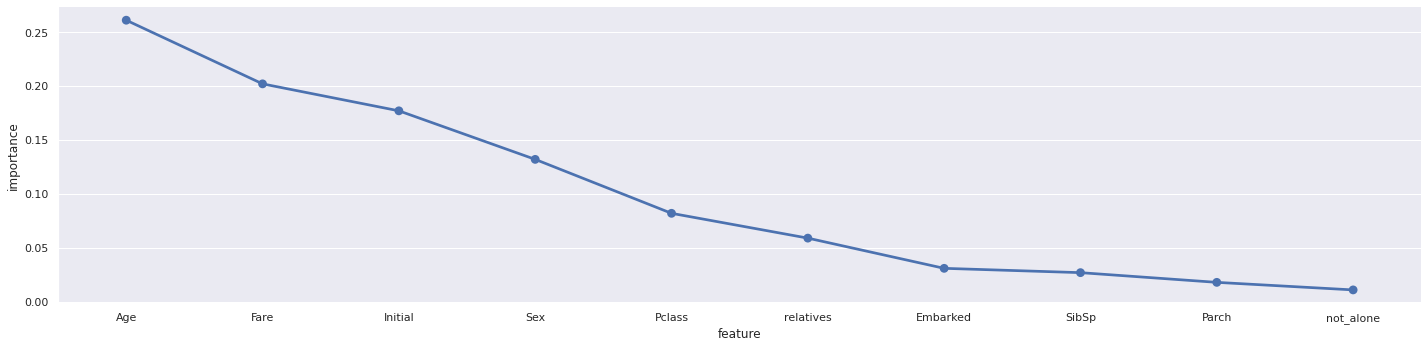

In [ ]:
importances_most = importances.head(10) # 10 most important features
axes = sns.factorplot('feature','importance', 
                      data=importances_most, aspect = 4, )

'SibSp', 'Parch' and 'not_alone' doesn’t play a significant role in our random forest classifiers prediction process. So, I will drop them from the dataset and train the classifier again.

In [ ]:
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.78873239 0.90140845 0.84507042 0.74647887 0.74647887
 0.78873239 0.78873239 0.8028169  0.67605634]
Mean: 0.7917840375586854
Standard Deviation: 0.05850724116774241


In [ ]:
# Droping 'SibSp', 'Parch' and 'not_alone' from the dataset

labeles=df['Survived']
features=df[['Pclass','Sex','Age','Initial','relatives','Fare','Embarked']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labeles, test_size=0.2,random_state=5 )

**Training random forest again:**

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, y_train)
acc_random_forest = round(random_forest.score(X_train, y_train) * 100, 2)
print(acc_random_forest,"%")

96.77 %


Our random forest model predicts as good as it did before.


# Conclusion:

1. Women had higher chances of survival.

2. The Class(Socio-Economic status) of the passengers had played a vital role in their survival.

3. First priority during Rescue is given to children and women, as the

 * persons<5 are saved by large numbers

 * women's are saved irrespective of their class, age or Fare

4. There's a saying that "money can't buy everything", but money do can save our lives as we saw that people with the higher Fare amount had survived.